# Adult Census Data Visualization

__Note: The prediction task is to determine whether a person makes over $50K a year.__

In [1]:
# Data Processing
import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../cleanedAdultCensus.csv")
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,education_,jobtype
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,HS,other
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,HS,private
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,college,other
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,preHS,private
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,college,private


Understanding the data format. We have a mix of numerical and categorcal values. Income is the response variable that we seek to predict. 

## Data Visualization and Analysis


The overall problem this project seeks to predict is given an individual, do they make `income >$50k`. Therefore, a starting place for data exploration is to understanding the distribution in the dataset as to the number of individuals whom made `income <$50k` and individuals whom made `income >$50k`.  

income
<=50K    24720
>50K      7841
dtype: int64


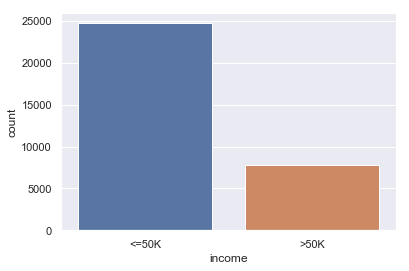

In [3]:
sns.countplot(df.income, label="Count")
print(df.groupby('income').size())

Above, is a count plot presenting the relationship between the discrete response variable and a count of the occurance. Currently, there are 3 times more individuals that recieve an `income <50k` than there are individuals that recieve an `income >50k`. Therefore, simply understanding the number of instances for each value we are set to predict will be benifitan during feature selection knowning this distribution ratio. 

Next is an analysis as to whether the education variable can provide some insights into the relationship to income. We will be using the new category called 'education_' which we created in 'Adult Census Data Cleaning.ipynb'. It contains the following education categories. 

In [4]:
print("Categories of educations")
df.education_.unique()

Categories of educations


array(['HS', 'college', 'preHS', 'postGrad'], dtype=object)

Below, is a bar chart indicating the level of education individuals have in relation to whether those individuals income. 

['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

<Figure size 720x1440 with 0 Axes>

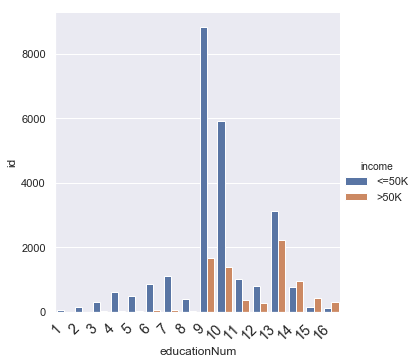

In [14]:
# create indexable variable for plotting purposes
df['id'] = df.index

print(df.education.unique())

plt.figure(figsize=(10,20))

chart = sns.catplot(
    x='educationNum', y='id',
    hue='income', kind='bar',
    data=df.groupby(['educationNum','income'])['id'].count().reset_index()
    )

plt.xticks(
    rotation = 45,
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 'x-large'
)


As previously discussed, it is known the distribution of income is majority `income <=50k`. However, we can infer from the bar plot above that it appears those  making `income <=50k` are often at an education level lower than a college level education. However, the biggest density of those individuals are `High School`  and `Some College`. Whereas, those with `income >50k` appears to be mostly consentrated in education levels beyond High School. 

Initially, before creating the `edu_categoires` those individuals in the `preHS` category where presented as their own invidual grade level _(e.g., 10th, 1st-4th)_ which realistically can be grouped in a higher level category to be viewed as a group that has not completed HS. This provides a data visualization easier to view the distribution of income at different education levels. 

Further analysis may be performed as to which of these columns could be a strong feature for predicting income and whether these values should be one-hot encoded. 

__Working Class Analysis__

Similar to the evaluation and methods performed on education type, a new column was created in "Adult Census Data Cleaning.ipynb" for the `workclass` that includes new categories that have been combined from the existing `workclass` column. In the new `jobtype` column, those individuals working in `government`-al type roles have all been combined instead of viewed sperately _(e.g., `Federal-gov`, `State-gov`, `Local-gov`)_. 

In [6]:
print("Original listing of values in WorkClass column:")
print(list(df.workclass.unique()))

Original listing of values in WorkClass column:
['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked']


In [7]:
print("New categories from workclass in the created jobtype column:")
print(list(df.jobtype.unique()))

# TOOD: evaluate differences (e.g., Odds ratio) on the workclass category for those self-indicating as 'never worked' or 'no-pay'.\
# This should be self indicative that they would be in the <50k. or Perhaps they are retiered at has passive income or come from a weathly family

New categories from workclass in the created jobtype column:
['other', 'private', 'government', 'entrepreneur']


Next we look to plot these values in association to income. Additionally, we will create a plot side by side showing the distribution between `Male` and `Female` `sex` attributes. 

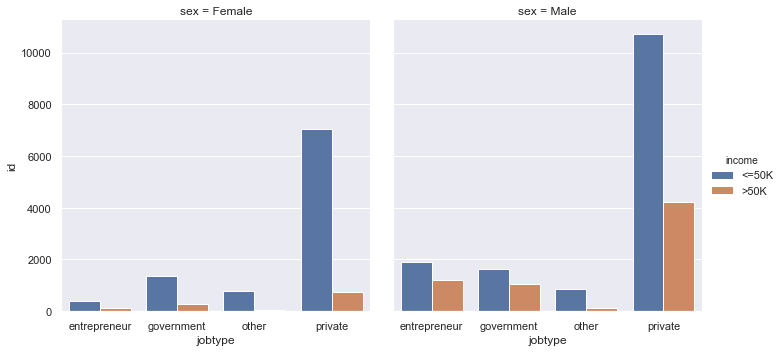

In [9]:
sns.catplot(x="jobtype", y='id', hue="income",
            kind="bar", col="sex", 
            data=df.groupby(['jobtype','sex','income'])['id'].count().reset_index())

In [17]:
df.maritalStatus.unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

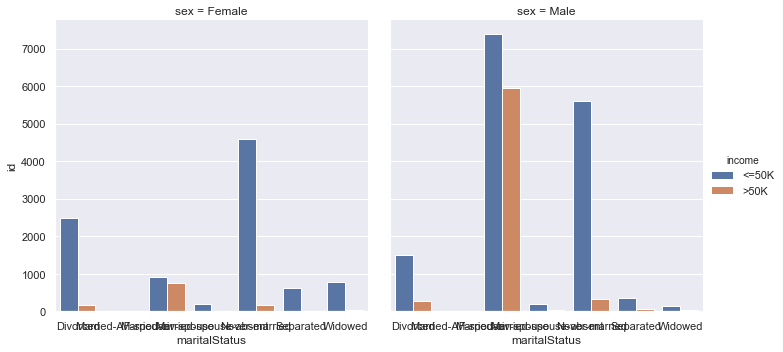

In [18]:
sns.catplot(x="maritalStatus", y='id', hue="income",
            kind="bar", col="sex", 
            data=df.groupby(['maritalStatus','sex','income'])['id'].count().reset_index())

Job Type Summary Table
income       jobtype  <=50K  >50K    sum
0       entrepreneur   2311  1346   3657
1         government   3010  1341   4351
2              other   1666   191   1857
3            private  17733  4963  22696


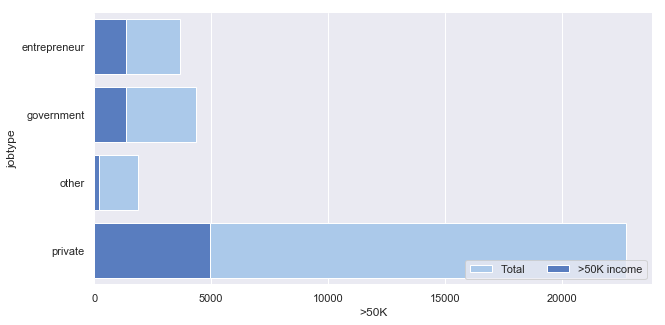

In [45]:
# https://seaborn.pydata.org/examples/horizontal_barplot.html
jobs_ct = pd.crosstab([df.jobtype], df.income).reset_index()
jobs_ct['sum'] = jobs_ct["<=50K"] + jobs_ct[">50K"]
print("Job Type Summary Table")
print(jobs_ct)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the total individuals by job type
sns.set_color_codes("pastel")
sns.barplot(x="sum", y="jobtype", data=jobs_ct,
            label="Total", color="b")

# Plot the individuals weere income was >50K
sns.set_color_codes("muted")
sns.barplot(x=">50K", y="jobtype", data=jobs_ct,
            label=">50K income", color="b")

# Add a legend and informative axis label
ax.t
ax.legend(ncol=3, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

### stacked plots

income        <=50K  >50K
jobtype                  
entrepreneur   2311  1346
government     3010  1341
other          1666   191
private       17733  4963


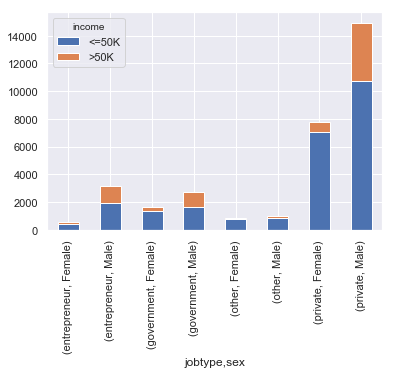

In [11]:
ct = pd.crosstab([df.jobtype,df.sex], df.income)
print(pd.crosstab(df.jobtype, df.income))
ct.plot.bar(stacked=True)
plt.legend(title='income')
plt.show()

__Analysis:__ There are two major interesting findings from the FacetGrid Bar chart above.

1. The `Private` industry clearly is most represented regardless of `sex` or `income` to be where the majority of the individuals surveyed in this study. Therefore, the `Private` industry alone appears to a candidate as a prediction variable for this classification problem. 

2. `sex:Males` are more represented that `sex:Females`.

In [48]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,education_,jobtype,lat,log
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,HS,other,39.495914459,-98.989982605
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,HS,private,39.495914459,-98.989982605
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,college,other,39.495914459,-98.989982605
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,preHS,private,39.495914459,-98.989982605
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,college,private,39.495914459,-98.989982605


# STATISTICAL EXPERIMENTS (DEV)

Perhaps use for later project goals. Or we can use it in this one. 

In [11]:
# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
ct = pd.crosstab([df.jobtype,df.sex], df.income)
ct = sm.stats.Table(ct)
ct.table_orig

income               <=50K  >50K
jobtype      sex                
entrepreneur Female    411   123
             Male     1900  1223
government   Female   1361   278
             Male     1649  1063
other        Female    794    52
             Male      872   139
private      Female   7026   726
             Male    10707  4237

### Odds Ratio for Sex on Income

Driving deeper into two variables of interest `sex` and `income` _(<=50k and >50k)_, we seek to understnad if there are any marginal associations evidence in the dataset to drive a statistical inferneces for our preliminary analysis prior to feature selection. This analysis is performed utilizing estimation of the odds ratio with the specific objective to understand: __the odds of `income= >50k` for an individual's `sex` representation. 

In [63]:
# sex on income cross-tabulation table (sex_ct)
sex_ct = pd.crosstab([df.sex], df.income)
chi2, p, dof, ex = stats.chi2_contingency(sex_ct, correction=False)

print("Pearson's Chi-squared test with Yates' continuity correction")
print("X-squared: ", chi2)
print("p-value  : ", p)
print("degree of f: ", dof)

oddsratio, pvalue = stats.fisher_exact(sex_ct, alternative='two-sided')
print("Odds Ratio: ", round(oddsratio, 3))

sex_ct_tab = sm.stats.Table2x2(sex_ct.values)
print("Odds Ratio CI: ", sex_ct_tab.oddsratio_confint())

print("\n2x2 Summary:", sex_ct_tab.summary())

Pearson's Chi-squared test with Yates' continuity correction
X-squared:  1518.8868199570722
p-value  :  0.0
degree of f:  1
Odds Ratio:  3.583
Odds Ratio CI:  (3.350578993632525, 3.8310435917758534)

2x2 Summary:                Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        3.583       3.351 3.831   0.000
Log odds ratio    1.276 0.034 1.209 1.343   0.000
Risk ratio        1.283       1.269 1.297   0.000
Log risk ratio    0.249 0.006 0.238 0.260   0.000
-------------------------------------------------


__Analysis__: the odds of `income >50k` for an individuals `sex` is:

$\hat{\theta}_{AC}=\dfrac{6662\times 9592}{1179\times 15128}=3.58$


In [64]:
# expected counts for the marginal odds ratio
print("The oods of making income >50K for a MALE individual than a FEMALE is: ",
      round((sex_ct[">50K"]['Male']*sex_ct["<=50K"]['Female']) / (sex_ct[">50K"]['Female']*sex_ct["<=50K"]['Male']),3))

The oods of making income >50K for a MALE individual than a FEMALE is:  3.583


__Interpretation:__ The estimated odds of an __individual making >50K for a MALE are 3.58 time as high as they are for a FEMALE__ _(on the odds scale)_. Our confidence is supported with a chi-square, $\chi^2$ statistic value of 1518.89 and a p-value ≈ 0. This statisitcal outcome represents the hypothesis test of independence of frequencies between `sex` on `income`. Therefore, there is strong evidence that being a `MALE` affects (increases) the chances that a given indvidual makes an income >$50k.

In [70]:
pd.crosstab(df.sex, df.education_ , margins= True,
                                  values=df.income, aggfunc='count')


education_,HS,college,postGrad,preHS,All
sex,,,,,
Female,3390,5438,622,1321,10771
Male,7111,10233,1514,2932,21790
All,10501,15671,2136,4253,32561


In [1]:
### Line GRAPH on Interaction Effects

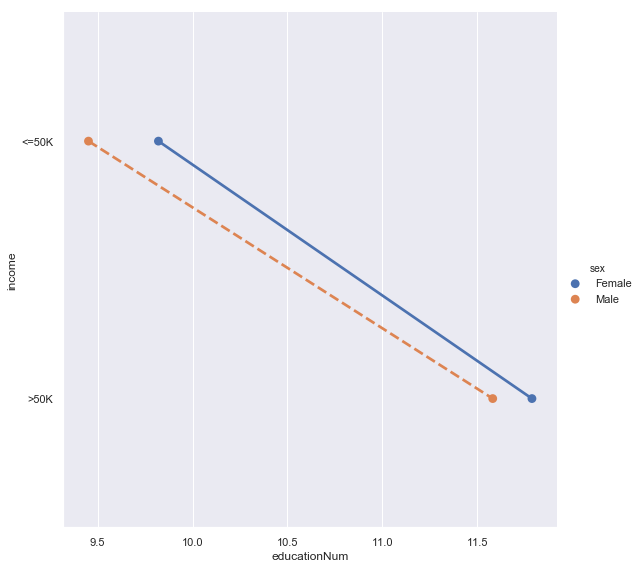

In [69]:
sns.catplot(x ="educationNum", y = "income",
           hue="sex",linestyles=["-", "--"],
            kind="point", data = df, height = 8, ci=None)

Job Type Summary Table
income       jobtype  <=50K  >50K    sum       pct
0       entrepreneur   2311  1346   3657  0.368061
1         government   3010  1341   4351  0.308205
2              other   1666   191   1857  0.102854
3            private  17733  4963  22696  0.218673


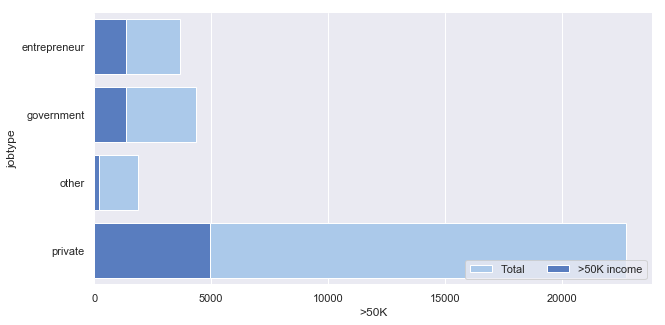

In [141]:
# https://seaborn.pydata.org/examples/horizontal_barplot.html
jobs_ct = pd.crosstab([df.jobtype], df.income).reset_index()
jobs_ct['sum'] = jobs_ct["<=50K"] + jobs_ct[">50K"]
jobs_ct['pct'] = jobs_ct[">50K"] / jobs_ct["sum"]
print("Job Type Summary Table")
print(jobs_ct)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the total individuals by job type
sns.set_color_codes("pastel")
sns.barplot(x="sum", y="jobtype", data=jobs_ct,
            label="Total", color="b")

# Plot the individuals weere income was >50K
sns.set_color_codes("muted")
sns.barplot(x=">50K", y="jobtype", data=jobs_ct,
            label=">50K income", color="b")

# Add a legend and informative axis label
ax.legend(ncol=3, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

From the above Job summary table and bar chart provides helpful insights as to how various job roles affects the representation of income earned. For instance, while the majority of individuals participating in the census study ~70%, the distribution between the `jobtype` groups for those earning `income: >50K` in the private job group is 21%. This is less than individuals in `jobtype` `entrepreneur` and `government` which individual earning `income: >50k` is 36% and 30%, respectively.  roles  with the `

In [143]:
22696 / 32561

0.6970301894904948

In [142]:
22696 + 1857 + 4351 + 3657

32561

In [4]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,education_,jobtype,age_decade
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,HS,other,90
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,HS,private,80
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,college,other,60
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,preHS,private,50
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,college,private,40


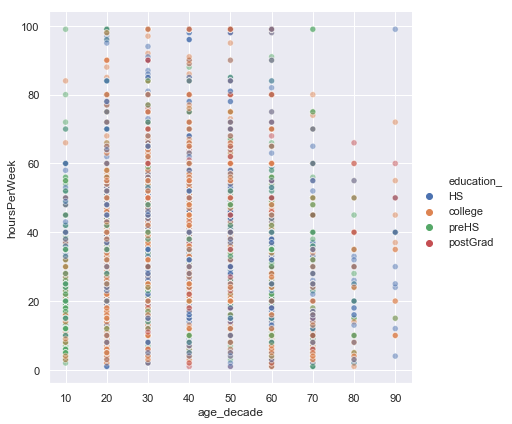

In [13]:
sns.relplot(x="age_decade", y="hoursPerWeek", hue="education_",
            sizes=(40, 400), alpha=.5, 
            height=6,data=df)

###

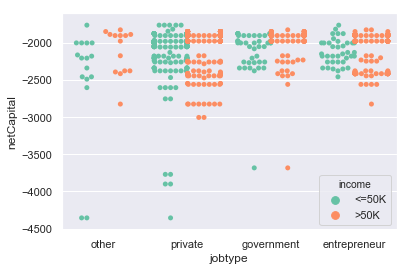

In [58]:
sns.swarmplot(x="jobtype", y="netCapital", hue="income",
                   data=df[:1000], palette="Set2", dodge=True)

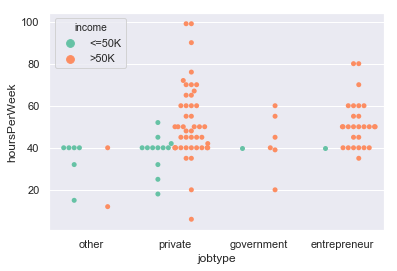

In [85]:
sns.swarmplot(x="jobtype", y="hoursPerWeek", hue="income",
                   data=df[:100], palette="Set2", dodge=True)


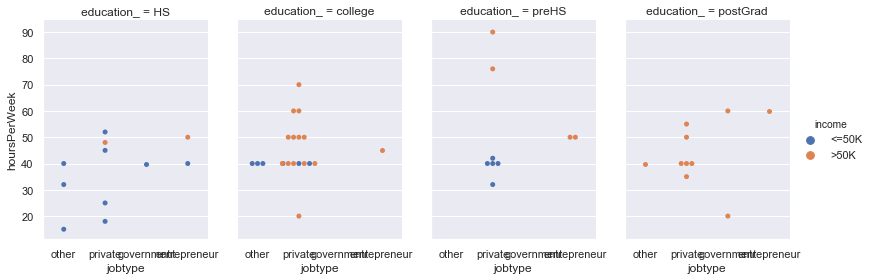

In [82]:
sns.catplot(x="jobtype", y="hoursPerWeek",
            hue="income", col="education_",
                data=df[:50], kind="swarm",
                height=4, aspect=.7)

#### Age v Hours Worked

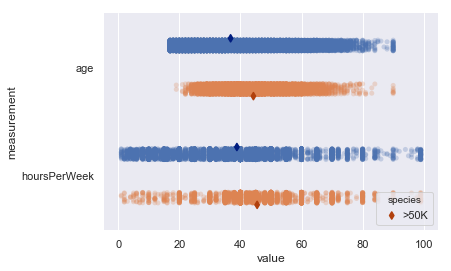

In [68]:
# https://seaborn.pydata.org/examples/jitter_stripplot.html
# "Melt" the dataset to "long-form" or "tidy" representation
df_ = pd.melt(df[["income","age", "hoursPerWeek"]], "income", var_name = "measurement")
#df_.head()

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="income",
              data=df_, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="income",
              data=df_, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

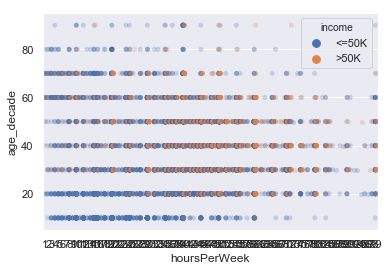

In [19]:
sns.stripplot(x="hoursPerWeek", y="age_decade", hue="income",
              data=df, dodge=True, alpha=.25, zorder=1)


In [19]:
# create new variable categorizes worked hours per week
df.loc[df.age > 40, "workhrs_"] = "overtime"
df.loc[(df.age <= 40) & (df.age >= 30), "workhrs_"] = "fulltime"
df.loc[(df.age < 30 ) & (df.age >= 20), "workhrs_"] = "partime"
df.loc[df.age < 20, "workhrs_"] = "limited"

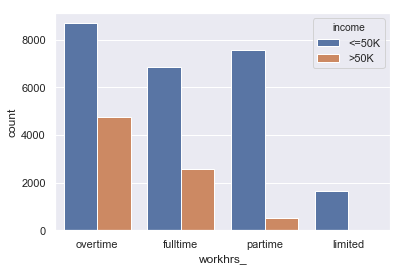

In [20]:
sns.countplot(x='workhrs_', hue='income', data=df)

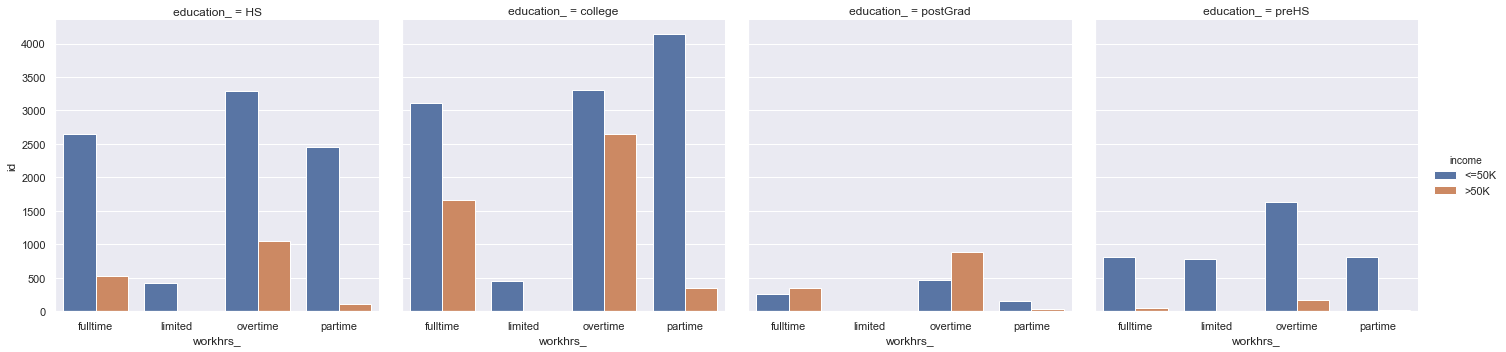

In [21]:
sns.catplot(x="workhrs_", y='id', hue="income",
            kind="bar", col="education_", 
            data=df.groupby(['workhrs_','education_','income'])['id'].count().reset_index())

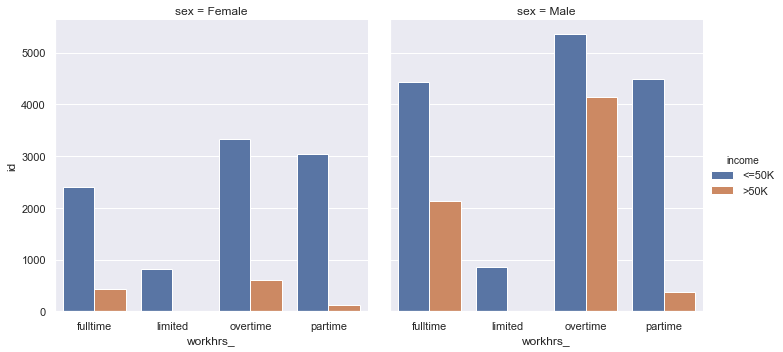

In [22]:
sns.catplot(x="workhrs_", y='id', hue="income",
            kind="bar", col="sex", 
            data=df.groupby(['workhrs_','sex','income'])['id'].count().reset_index())

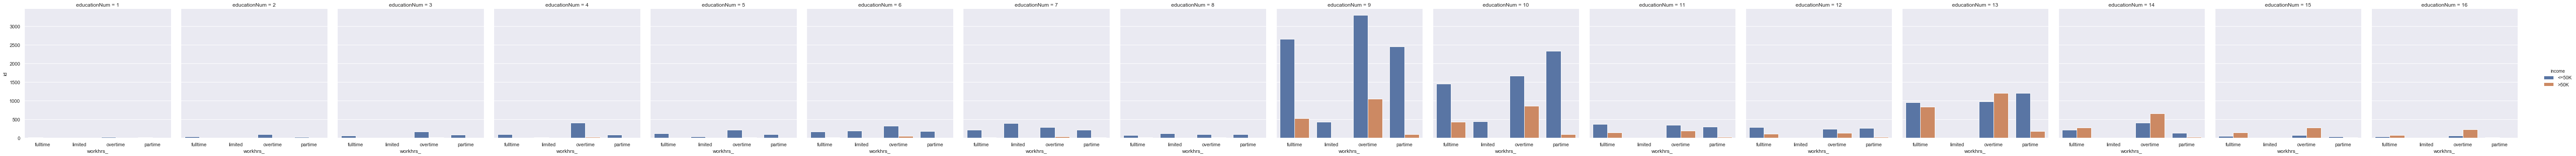

In [25]:
sns.catplot(x="workhrs_", y='id', hue="income",
            kind="bar", col="educationNum", 
            data=df.groupby(['workhrs_','educationNum','income'])['id'].count().reset_index())

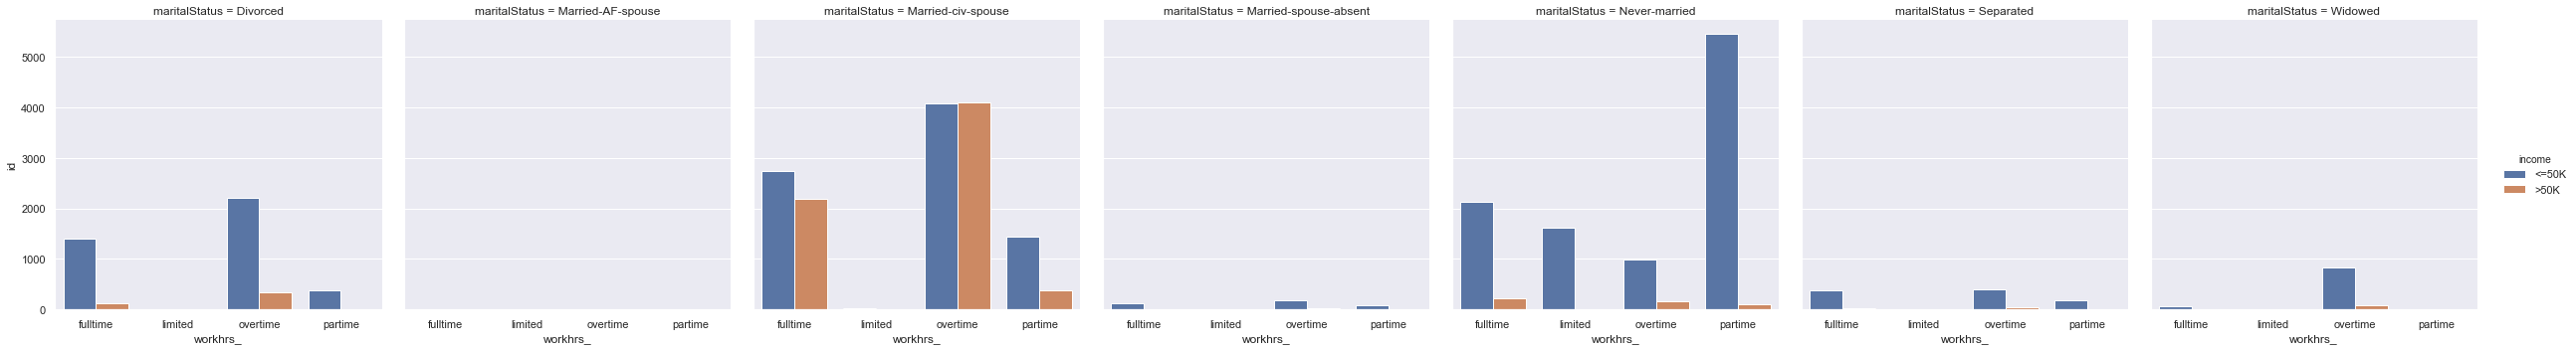

In [26]:
sns.catplot(x="workhrs_", y='id', hue="income",
            kind="bar", col="maritalStatus", 
            data=df.groupby(['workhrs_','maritalStatus','income'])['id'].count().reset_index())

In [38]:
df.ag

array(['Female', 'Male'], dtype=object)

In [39]:
maritalStatus_ = {
    'Widowed':'single',
    'Divorced':'single',
    'Separated':'single',
    'Never-married':'single',
    'Married-civ-spouse':'married',
    'Married-spouse-absent':'a_other',
    'Married-AF-spouse':'a_other'
}
df['maritalStatus_'] = df.maritalStatus.map(lambda x: maritalStatus_[x])

In [40]:
print(maritalStatus_)

{'Widowed': 'single', 'Divorced': 'single', 'Separated': 'single', 'Never-married': 'single', 'Married-civ-spouse': 'married', 'Married-spouse-absent': 'a_other', 'Married-AF-spouse': 'a_other'}


In [41]:
# compute the nearest 10 for person's decade birth
df['age_decade'] = (df.age // 10) * 10

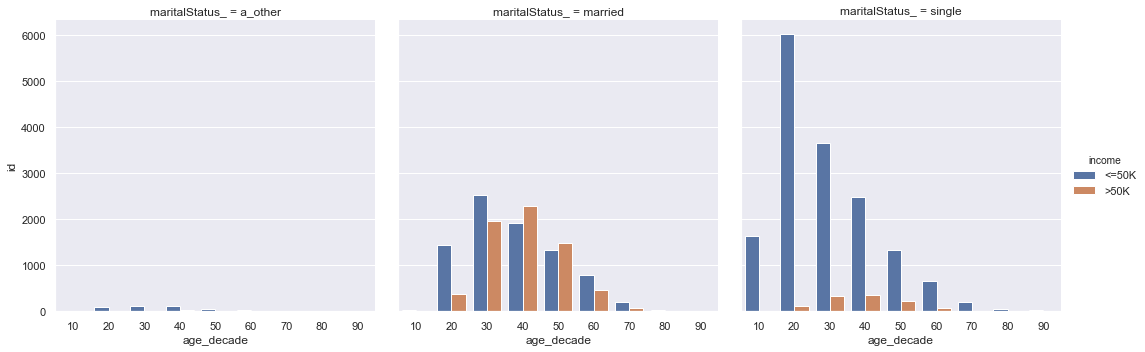

In [42]:
sns.catplot(x="age_decade", y='id', hue="income",
            kind="bar", col="maritalStatus_", 
            data=df.groupby(['age_decade','maritalStatus_','income'])['id'].count().reset_index())

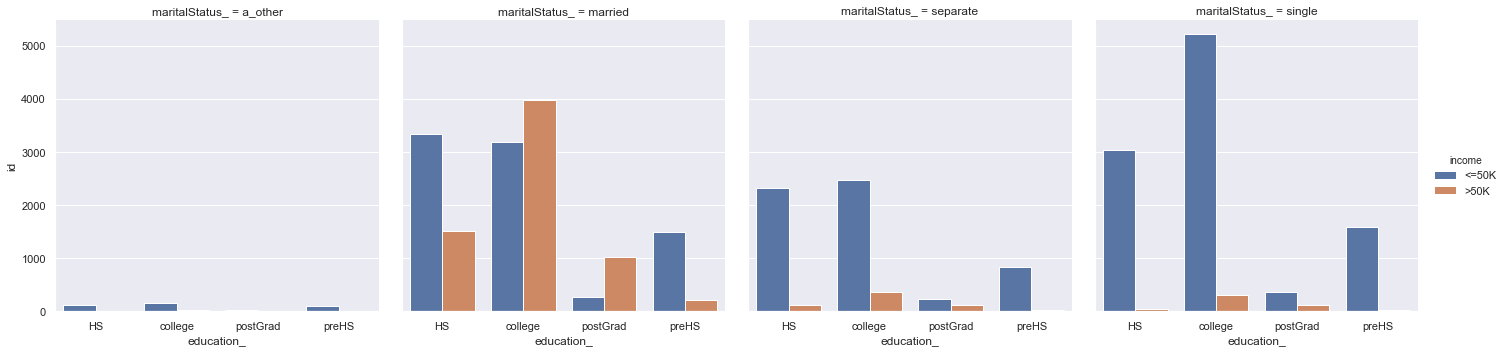

In [34]:
sns.catplot(x="education_", y='id', hue="income",
            kind="bar", col="maritalStatus_", 
            data=df.groupby(['education_','maritalStatus_','income'])['id'].count().reset_index())

In [28]:
maritalStatus_ = {
    'Widowed':'separate',
    'Divorced':'separate',
    'Separated':'separate',
    'Never-married':'single',
    'Married-civ-spouse':'a_other',
    'Married-spouse-absent':'a_other',
    'Married-AF-spouse':'married'
}

In [43]:
df.relationship.unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

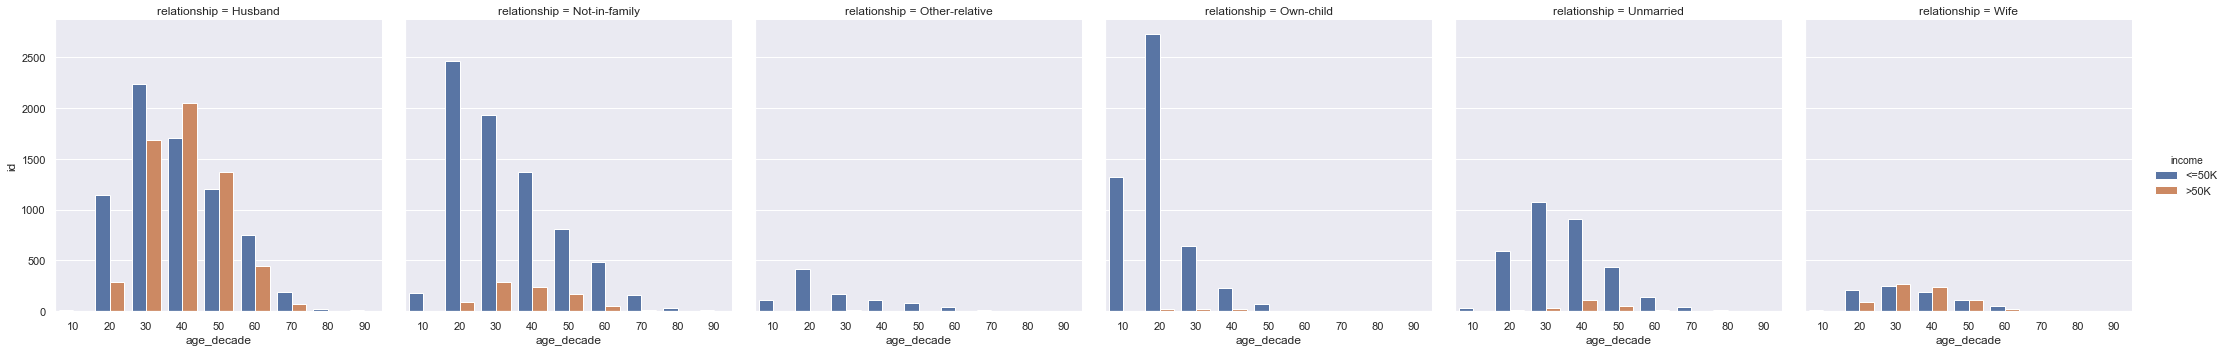

In [46]:
sns.catplot(x="age_decade", y='id', hue="income",
            kind="bar", col="relationship", 
            data=df.groupby(['age_decade','relationship','income'])['id'].count().reset_index())

In [49]:
df.loc[df.nativeCountry == 'United-States', 'USA'] = 1
df.loc[df.nativeCountry != 'United-States', 'USA'] = 0


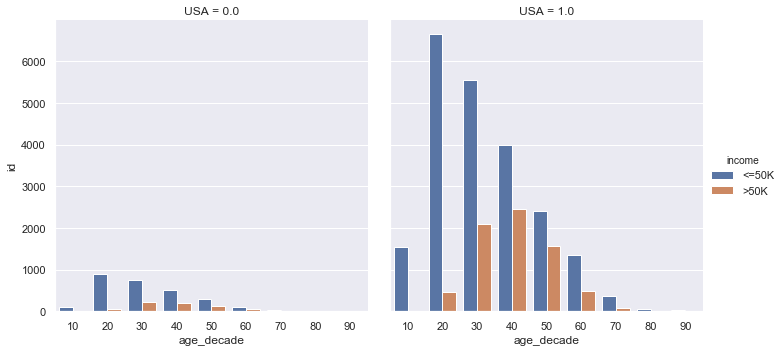

In [50]:
sns.catplot(x="age_decade", y='id', hue="income",
            kind="bar", col="USA", 
            data=df.groupby(['age_decade','USA','income'])['id'].count().reset_index())

In [55]:
#  consolidate capital gain/loss into a single net metric.
df['netCapital'] = df['capitalGain']  - df['capitalLoss']

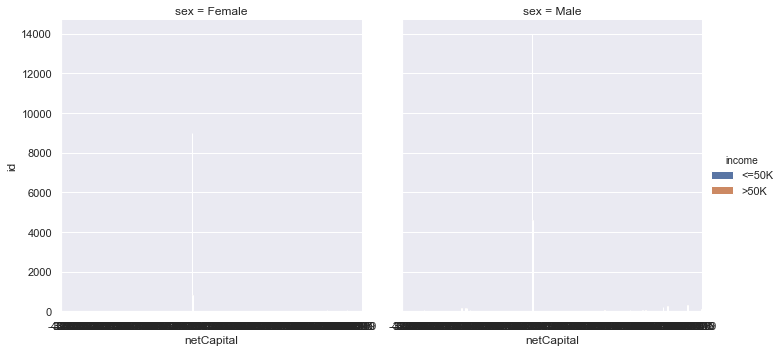

In [56]:

sns.catplot(x="sex", y='id', hue="income",
            kind="bar", col="USA", 
            data=df.groupby(['sex','USA','income'])['id'].count().reset_index())

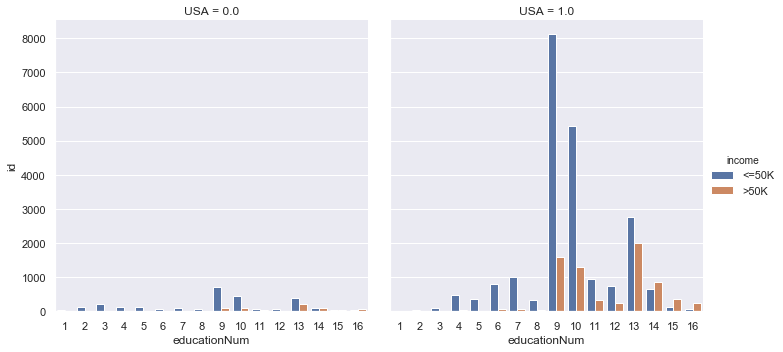

In [52]:

sns.catplot(x="educationNum", y='id', hue="income",
            kind="bar", col="USA", 
            data=df.groupby(['educationNum','USA','income'])['id'].count().reset_index())

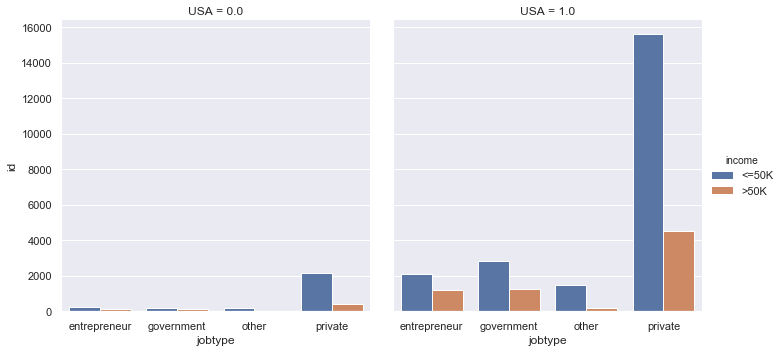

In [54]:

sns.catplot(x="jobtype", y='id', hue="income",
            kind="bar", col="USA", 
            data=df.groupby(['jobtype','USA','income'])['id'].count().reset_index())

In [48]:
df.nativeCountry.unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [23]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,education_,jobtype,id,workhrs_
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,HS,other,0,overtime
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,HS,private,1,overtime
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,college,other,2,overtime
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,preHS,private,3,overtime
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,college,private,4,overtime


In [121]:
df.loc[df.income == "<=50K", "income_"] = 0
df.loc[df.income == ">50K", "income_"] = 1


In [139]:
df.groupby(['workhrs_', 'education_'])["workhrs_"].sum().transform(lambda x: x/np.sum(x)*100)

age     fnlwgt  educationNum  capitalGain  \
workhrs_ education_                                                    
fulltime HS           8.809583   9.852980      8.705600     5.023605   
         college     13.275150  14.717320     16.854894    17.319199   
         postGrad     1.703792   1.873999      2.633463     4.325575   
         preHS        2.368305   2.980861      1.467537     0.563929   
limited  HS           0.630922   1.414451      1.168058     0.243687   
         college      0.676932   1.409524      1.386498     0.042848   
         postGrad     0.001433   0.002523      0.004265     0.000000   
         preHS        1.090143   2.443001      1.580565     0.183780   
overtime HS          18.104337  12.575732     11.908164    10.442803   
         college     24.114094  17.576410     21.046683    39.098203   
         postGrad     5.513999   3.823765      5.934127    13.721487   
         preHS        7.936991   5.421484      2.781831     2.249129   
partime  HS           5.033763   8.366354      7.011093     1.551503   
         college      8.737623  14.002641     15.297788     4.644438   
         postGrad     0.390605   0.562357      0.790283     0.150402   
         preHS        1.612329   2.976597      1.429150     0.439413   

                     capitalLoss  hoursPerWeek  age_decade    hr_by10  \
workhrs_ education_                                                     
fulltime HS             8.064692     10.266017    8.794158  10.334363   
         college       17.048721     15.815336   13.271380  15.870996   
         postGrad       3.692511      2.079163    1.691115   2.088684   
         preHS          1.670736      2.683104    2.370983   2.701144   
limited  HS             0.608225      1.029328    0.383608   1.013126   
         college        0.819678      0.940013    0.408821   0.896166   
         postGrad       0.000000      0.004557    0.000900   0.004742   
         preHS          1.110001      1.408462    0.698778   1.313429   
overtime HS            13.466352     13.250180   18.847196  13.239397   
         college       26.473071     19.096382   25.035344  19.108733   
         postGrad       9.854047      4.546041    5.721695   4.557488   
         preHS          3.707778      5.263070    8.270975   5.260038   
partime  HS             3.891265      7.814707    4.605091   7.856866   
         college        8.054842     12.718086    8.088176  12.660919   
         postGrad       0.377282      0.580018    0.329578   0.579268   
         preHS          1.160798      2.505537    1.482202   2.514640   

                       income_         id  
workhrs_ education_                        
fulltime HS           6.670068   9.954541  
         college     21.107002  14.295193  
         postGrad     4.412702   1.666993  
         preHS        0.675934   2.792843  
limited  HS           0.000000   1.433140  
         college      0.000000   1.466531  
         postGrad     0.000000   0.002796  
         preHS        0.025507   2.663860  
overtime HS          13.391149  13.079211  
         college     33.783956  17.139047  
         postGrad    11.274072   3.466960  
         preHS        2.168091   5.776189  
partime  HS           1.300854   8.547000  
         college      4.501977  14.411776  
         postGrad     0.446372   0.598604  
         preHS        0.242316   2.705316

In [126]:
# create indexable variable for plotting purposes
df['id'] = df.index

In [144]:
df[df.educationNum==9]

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,...,hoursPerWeek,nativeCountry,income,education_,jobtype,age_decade,hr_by10,workhrs_,income_,id
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,...,40,United-States,<=50K,HS,other,90,40,overtime,0.0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,18,United-States,<=50K,HS,private,80,10,overtime,0.0,1
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,45,United-States,<=50K,HS,private,30,40,fulltime,0.0,5
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,...,40,United-States,<=50K,HS,government,60,40,overtime,0.0,8
22,61,Private,29059,HS-grad,9,Divorced,Sales,Unmarried,White,Female,...,25,United-States,<=50K,HS,private,60,20,overtime,0.0,22
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,...,32,United-States,<=50K,HS,other,60,30,overtime,0.0,24
34,60,Self-emp-not-inc,205246,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Black,Male,...,50,United-States,>50K,HS,entrepreneur,60,50,overtime,1.0,34
36,53,Private,149650,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,...,48,United-States,>50K,HS,private,50,40,overtime,1.0,36
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,...,15,United-States,<=50K,HS,other,70,10,overtime,0.0,44
46,71,Private,110380,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,...,52,United-States,<=50K,HS,private,70,50,overtime,0.0,46


In [ ]:
x, y, hue = "day", "proportion", "sex"
hue_order = ["Male", "Female"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In [ ]:
df.groupby(['workhrs_', 'office_id']).agg({'sales': 'sum'})

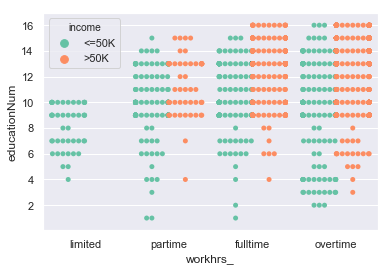

In [118]:
sns.swarmplot(x="workhrs_", y="educationNum", hue="income",
                   data=df, palette="Set2", dodge=True,
             order=["limited","partime", "fulltime", "overtime"])

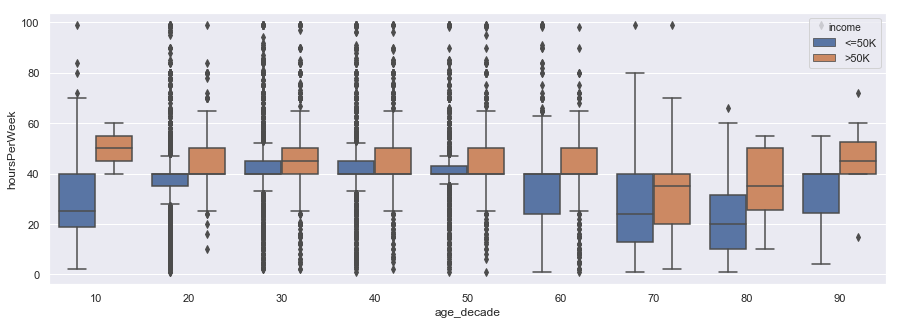

In [10]:
# compute the nearest 10 for person's decade birth
df['age_decade'] = (df.age // 10) * 10

# create box chart and plot persons # of hours worked per week
# and the distribution arcross their age in decades
plt.figure(figsize=(15,5))
sns.boxplot(x="age_decade", y="hoursPerWeek", hue="income", data=df)   

plt.show()
plt.clf()
plt.close()

In [97]:
ageism = df[["age", "income"]]
ageism["Age"] = pd.qcut(df['age'], 10)

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, '# of Individuals in Study')

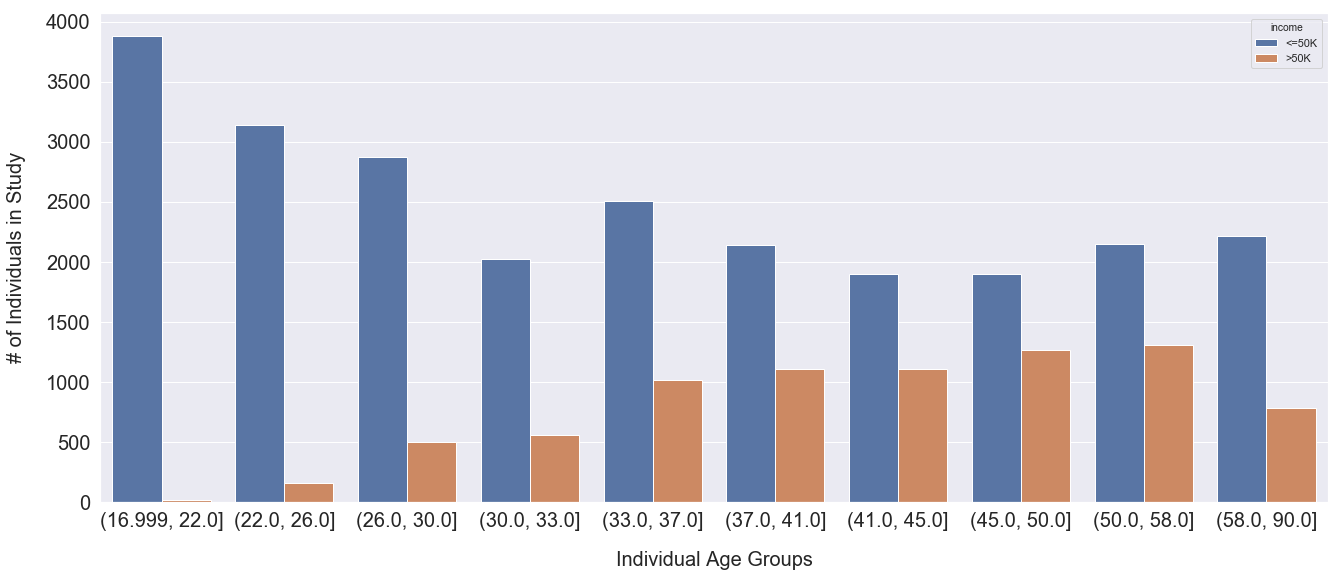

In [103]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='income', data=ageism, )
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Individual Age Groups', size=20, labelpad=20)
plt.ylabel('# of Individuals in Study', size=20, labelpad=20)

In [ ]:
df.loc

In [ ]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

In [87]:
import numpy as np

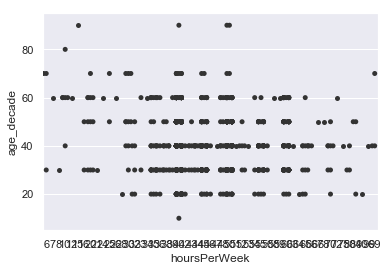

In [94]:
sns.swarmplot(x="hoursPerWeek", y="age_decade", data=df[2000:3000], color=".2")

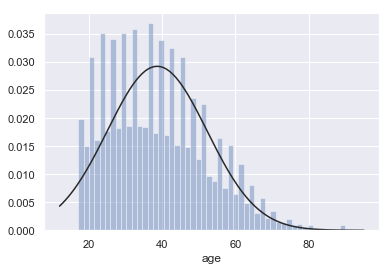

In [48]:
from scipy.stats import norm
sns.distplot(df.age, fit=norm, kde=False)

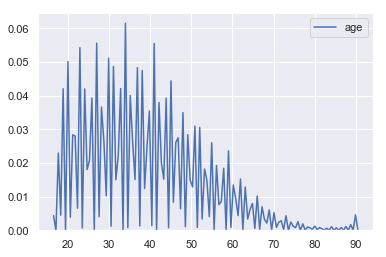

In [49]:
sns.kdeplot(df.age, bw=.15)

## A Global Perspective

To gain a global perspective of the various countries participating in this study, a helpful visual is creating a geographic scatter plot presenting which `nativeCountry` are in scope for this analysis. Prior to the geo-scatter plot, all countries are mapped by using their respective `longitude` and `latitude` coordinates. 

In [47]:
from variable_maps import country_coordinate
df['lat'] = df.nativeCountry.map(lambda x: country_coordinate[x]['lat'])
df['log'] = df.nativeCountry.map(lambda x: country_coordinate[x]['log'])


Utilizing the [plotly](https://plot.ly/python/scatter-plots-on-maps/) graphying library below are the contries participating in the study. 

![](https://github.com/KayMSDS/Machine-Learning-Projects-MSDS-7331/blob/master/lab01_data_viz/dev/country_map.png)

![]("./country_map.png")

In [45]:
#https://plot.ly/python/scatter-plots-on-maps/
import plotly.express as px
fig = px.scatter_geo( 
    df,
    lon= df['log'],
    lat = df['lat'],
    text = df['nativeCountry'],
    title = "Countries Participating in Study")
fig.show()